<a href="https://colab.research.google.com/github/fantaxiah/MachineLearningFall23/blob/main/MATH8334CaseStudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Load the dataset into your R/Python

In [4]:
data = pd.read_csv('/content/QualityOfLifeData.csv')
data

,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_16,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE
0,171,0,1,49,3,2,4,4,4,4,...,2,2,3,4,2,1,4,5,2,1.60
1,171,427,1,49,3,2,4,3,4,4,...,3,1,2,4,2,1,4,5,2,1.60
2,172,0,1,62,3,2,3,3,4,2,...,5,1,1,1,2,1,4,5,3,1.54
3,179,0,1,44,7,2,6,6,6,6,...,6,6,5,5,4,4,4,5,1,2.97
4,180,0,1,64,3,1,3,2,3,3,...,1,1,1,1,1,4,4,5,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2834,0,2,60,4,1,4,4,4,3,...,2,1,2,2,1,4,4,5,1,2.54
2352,2835,0,1,81,4,1,3,4,3,5,...,2,1,3,2,1,4,4,5,0,0.34
2353,2836,0,1,40,3,1,4,3,4,4,...,1,1,4,1,1,4,4,5,1,0.63
2354,2837,0,1,54,4,1,4,2,3,3,...,1,1,1,1,1,4,4,5,0,0.86


2. We will create a new dichotomous response variable based on the variable ”CHRONICDISEASESCORE”. However, it has some missing data (denoted by ”-9”). First
remove these missing information.

In [5]:
column_values = data['CHRONICDISEASESCORE']
print(column_values)

0       1.60
1       1.60
2       1.54
3       2.97
4       1.28
        ... 
2351    2.54
2352    0.34
2353    0.63
2354    0.86
2355    1.28
Name: CHRONICDISEASESCORE, Length: 2356, dtype: float64


In [6]:
unique_values = data['CHRONICDISEASESCORE'].unique()
print(unique_values)

[ 1.6   1.54  2.97  1.28  1.31  1.67  2.21  2.51  2.44  0.48  1.06 -9.
  1.25  2.04  2.08  0.66  0.88  1.57  3.18  0.74  2.34  0.34  1.97  0.67
  0.81  1.01  2.87  2.57  1.2   1.27  0.95  0.52  1.42  1.02  2.33  3.14
  1.73  4.76  2.58  2.46  1.12  1.48  0.77  2.45  0.54  0.82  1.26  4.15
  3.17  2.23  3.26  2.89  1.99  1.65  0.91  2.17  2.64  0.72  2.94  1.74
  1.83  1.33  2.07  2.11  1.63  1.87  1.13  2.05  2.54  0.94  1.89  1.98
  3.15  3.65  0.4   1.45  1.78  2.81  2.41  0.6   2.42  1.88  2.67  2.1
  1.66  1.79  1.71  1.84  1.15  1.3   2.79  1.14  0.84  3.07  1.23  2.24
  1.22  2.72  2.3   0.61  2.48  1.4   1.35  0.    2.69  1.36  2.13  2.15
  2.93  3.29  1.46  2.09  1.68  2.25  1.95  2.2   2.49  1.81  4.26  1.49
  1.03  2.66  2.19  1.55  2.37  3.24  2.43  1.9   2.5   1.96  1.61  1.75
  3.08  0.97  2.36  1.76  1.32  2.99  3.    3.03  1.5   2.4   0.68  1.52
  1.85  0.29  0.23  2.56  2.88  2.65  3.11  3.41  2.29  1.34  0.92  1.8
  3.6   1.77  1.86  0.63  0.32  2.8   0.8   2.01  2.52 

In [7]:
mask = (data['CHRONICDISEASESCORE'] != -9)
filt_data = data[mask]

3. And, then create a new variable called ”CAT CHRONICDISEASESCORE” (this will
be our response variable) by dividing the it to two groups called ”minor disease”
(denoted by 0) and ”severe disease (denoted by 1) based on the mean value. That is, if
a certain patient CHRONICDISEASESCORE is less than its mean, then he has minor
disease.

In [8]:
mean_value = filt_data['CHRONICDISEASESCORE'].mean()
print("Mean:", mean_value)

Mean: 1.4974706413730805


In [9]:
filt_data['CAT_CHRONICDISEASESCORE'] = filt_data['CHRONICDISEASESCORE'].apply(lambda x: 0 if x < mean_value else 1)
filt_data

<ipython-input-9-972d8e72a2dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_data['CAT_CHRONICDISEASESCORE'] = filt_data['CHRONICDISEASESCORE'].apply(lambda x: 0 if x < mean_value else 1)


,ID,INTERVIEWDATE,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,...,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE,CAT_CHRONICDISEASESCORE
0,171,0,1,49,3,2,4,4,4,4,...,2,3,4,2,1,4,5,2,1.60,1
1,171,427,1,49,3,2,4,3,4,4,...,1,2,4,2,1,4,5,2,1.60,1
2,172,0,1,62,3,2,3,3,4,2,...,1,1,1,2,1,4,5,3,1.54,1
3,179,0,1,44,7,2,6,6,6,6,...,6,5,5,4,4,4,5,1,2.97,1
4,180,0,1,64,3,1,3,2,3,3,...,1,1,1,1,4,4,5,0,1.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2834,0,2,60,4,1,4,4,4,3,...,1,2,2,1,4,4,5,1,2.54,1
2352,2835,0,1,81,4,1,3,4,3,5,...,1,3,2,1,4,4,5,0,0.34,0
2353,2836,0,1,40,3,1,4,3,4,4,...,1,4,1,1,4,4,5,1,0.63,0
2354,2837,0,1,54,4,1,4,2,3,3,...,1,1,1,1,4,4,5,0,0.86,0


4. Check for any other missing data. If data is missing for more than 60% of the observations, it may be wise to discard that variable. If needed, consider any data imputation
method available in the ”Hmisc” or ”mi” packages in R or ”sklearn.impute” in Python.

In [10]:
missing_data = filt_data.isna().sum()
print(missing_data)

ID                         0
INTERVIEWDATE              0
LANGUAGE                   0
AGE                        0
RACE_ETHNICITY             0
SEX                        0
QOL_Q_01                   0
QOL_Q_02                   0
QOL_Q_03                   0
QOL_Q_04                   0
QOL_Q_05                   0
QOL_Q_06                   0
QOL_Q_07                   0
QOL_Q_08                   0
QOL_Q_09                   0
QOL_Q_10                   0
MSA_Q_01                   0
MSA_Q_02                   0
MSA_Q_03                   0
MSA_Q_04                   0
MSA_Q_05                   0
MSA_Q_06                   0
MSA_Q_07                   0
MSA_Q_08                   0
MSA_Q_09                   0
MSA_Q_10                   0
MSA_Q_11                   0
MSA_Q_12                   0
MSA_Q_13                   0
MSA_Q_14                   0
MSA_Q_15                   0
MSA_Q_16                   0
MSA_Q_17                   0
PH2_Q_01                   0
PH2_Q_02      

In [11]:
#There is no missing data, but the InterviewDate colum is almost entirely zeros so I'm going to remove it
del filt_data['INTERVIEWDATE']
filt_data

,ID,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,...,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE,CAT_CHRONICDISEASESCORE
0,171,1,49,3,2,4,4,4,4,1,...,2,3,4,2,1,4,5,2,1.60,1
1,171,1,49,3,2,4,3,4,4,5,...,1,2,4,2,1,4,5,2,1.60,1
2,172,1,62,3,2,3,3,4,2,4,...,1,1,1,2,1,4,5,3,1.54,1
3,179,1,44,7,2,6,6,6,6,6,...,6,5,5,4,4,4,5,1,2.97,1
4,180,1,64,3,1,3,2,3,3,2,...,1,1,1,1,4,4,5,0,1.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2834,2,60,4,1,4,4,4,3,3,...,1,2,2,1,4,4,5,1,2.54,1
2352,2835,1,81,4,1,3,4,3,5,4,...,1,3,2,1,4,4,5,0,0.34,0
2353,2836,1,40,3,1,4,3,4,4,3,...,1,4,1,1,4,4,5,1,0.63,0
2354,2837,1,54,4,1,4,2,3,3,3,...,1,1,1,1,4,4,5,0,0.86,0


5. Perform descriptive analysis as necessary (include correlation analysis and any other
graphs/tests that is needed check the relationship between the response and the predictor variables). Comment on your findings.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
filt_data.describe()

,ID,LANGUAGE,AGE,RACE_ETHNICITY,SEX,QOL_Q_01,QOL_Q_02,QOL_Q_03,QOL_Q_04,QOL_Q_05,...,MSA_Q_17,PH2_Q_01,PH2_Q_02,TOS_Q_01,TOS_Q_02,TOS_Q_03,TOS_Q_04,CHARLSONSCORE,CHRONICDISEASESCORE,CAT_CHRONICDISEASESCORE
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,1465.406504,1.208220,58.635050,3.619241,1.421861,3.665763,3.415086,3.710479,3.020325,3.113821,...,2.065492,2.473803,2.361337,2.226287,3.288166,3.776423,4.670732,0.906956,1.497471,0.476965
std,759.615161,0.406127,12.327566,1.247505,0.493968,1.035010,1.136332,1.024203,1.304184,1.283444,...,1.531047,1.759871,1.733346,1.310328,1.364476,0.993956,1.272065,1.628490,0.789355,0.499582
min,171.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,822.250000,1.000000,52.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,0.000000,0.880000,0.000000
50%,1416.000000,1.000000,59.000000,3.000000,1.000000,4.000000,3.000000,4.000000,3.000000,3.000000,...,1.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,1.000000,1.395000,0.000000
75%,2125.750000,1.000000,66.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,1.000000,1.970000,1.000000
max,2838.000000,2.000000,90.000000,7.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,10.000000,4.760000,1.000000


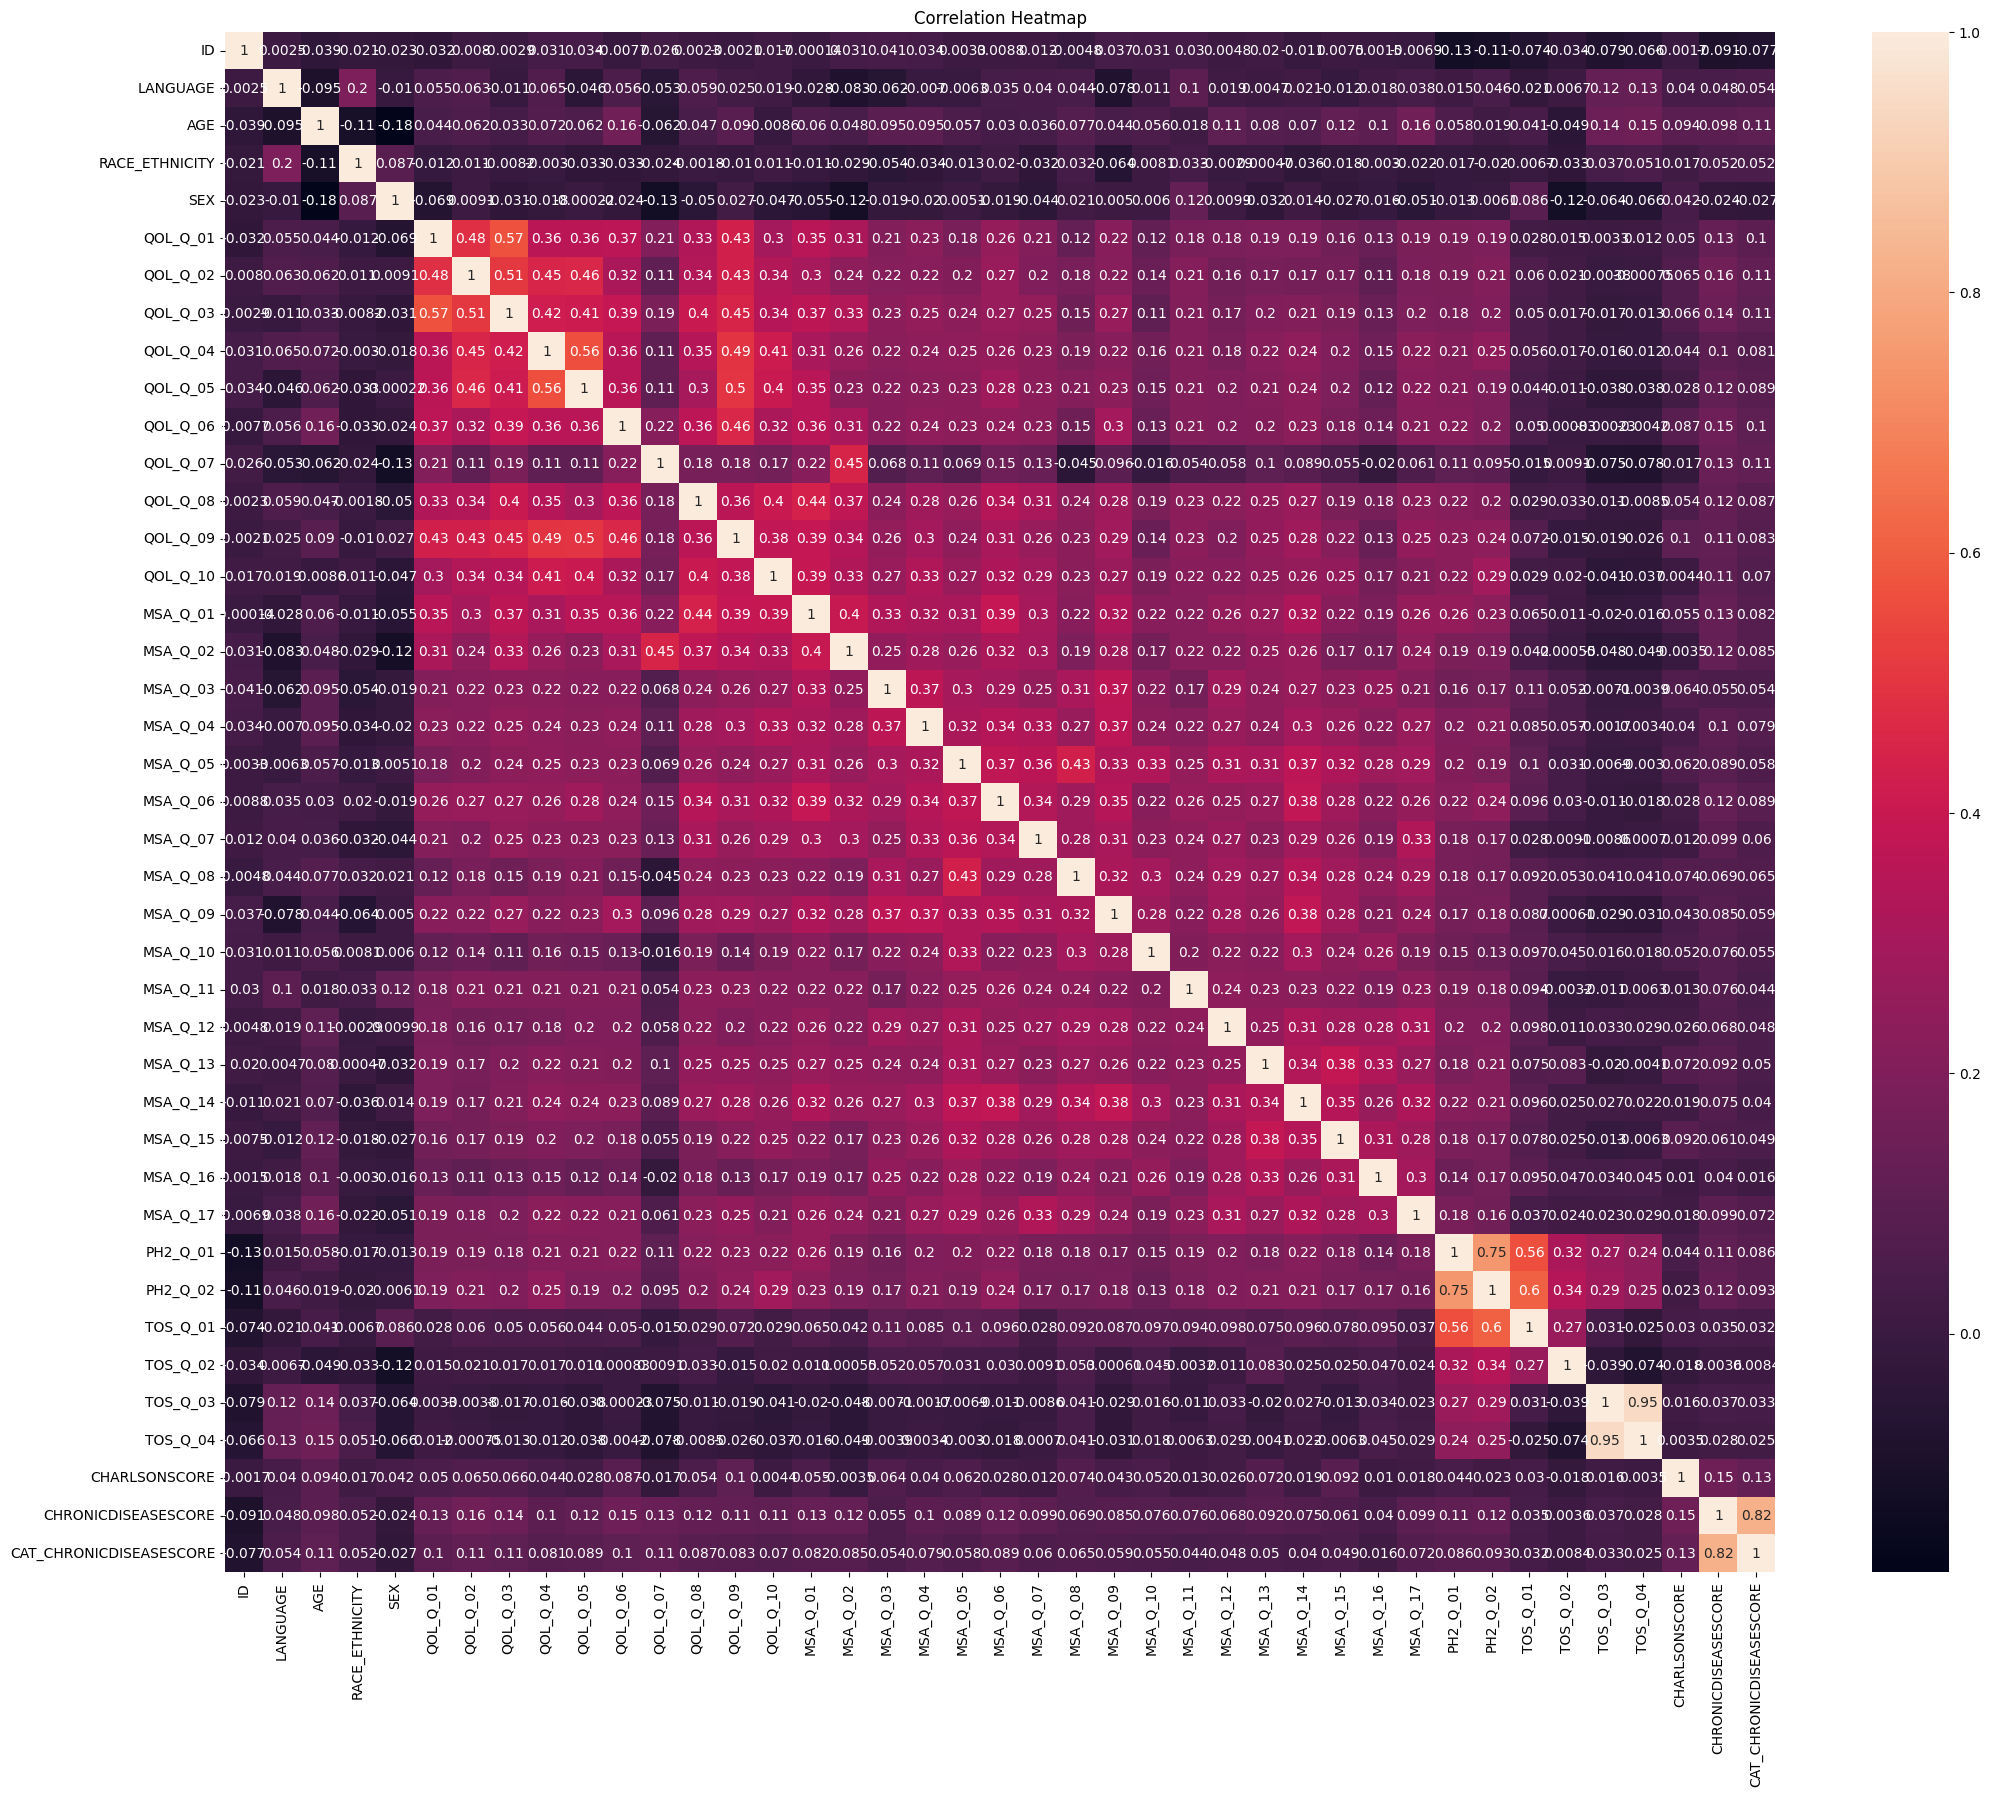

In [14]:
correlation_matrix = filt_data.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

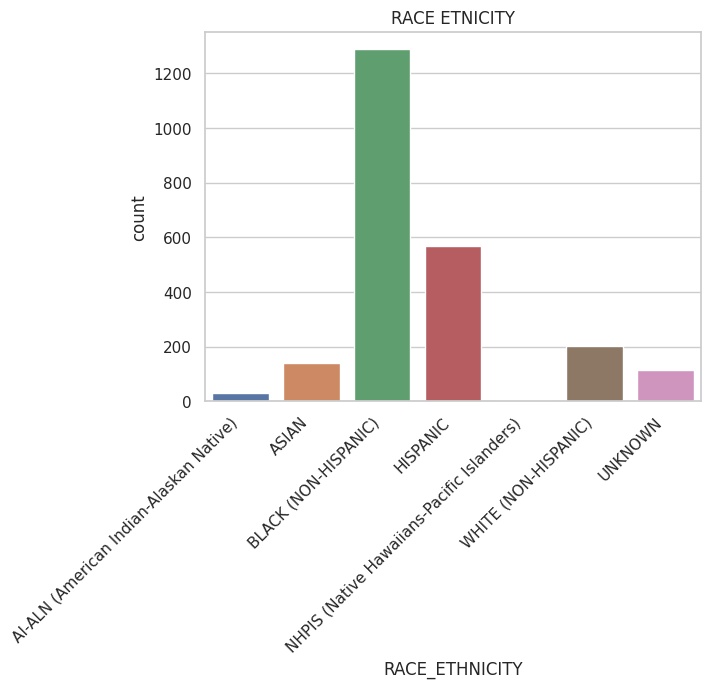

3    1288
4     570
6     204
2     142
7     115
1      31
5       6
Name: RACE_ETHNICITY, dtype: int64


In [15]:
sns.set(style="whitegrid")
ax = sns.countplot(data=data, x='RACE_ETHNICITY')

custom_labels = [
    'AI-ALN (American Indian-Alaskan Native)',
    'ASIAN',
    'BLACK (NON-HISPANIC)',
    'HISPANIC',
    'NHPIS (Native Hawaiians-Pacific Islanders)',
    'WHITE (NON-HISPANIC)',
    'UNKNOWN'
]

ax.set_xticklabels(custom_labels, rotation=45, ha="right")

plt.title('RACE ETNICITY')
plt.show()

race = data['RACE_ETHNICITY'].value_counts()
print(race)

6. Do the Train (80%):Test(20%) data split based on the stratified sampling. [Hint: use
createDataPartition() in R or train test split() from Python ”sklearn.model selection”
module]

In [16]:
data=data.drop(columns=['ID']) #remove ID column

In [18]:
X = data.drop(columns=['CAT_CHRONICDISEASESCORE'])
y = data['CAT_CHRONICDISEASESCORE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

KeyError: ignored